# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

* How does the choice of school play into academic performance?
* Are there differences in achievement based on gender, location, or student attitudes?
* Are there differences in achievement based on teacher practices and attitudes?
* Does there exist inequality in academic achievement?
* How do political freedom and civil rights relate to academic performance?
* Does access to the internet at school or at home relate to academic performance

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# We have a lot of columns in our data set
pd.set_option('display.max_columns', 650)
pd.set_option('display.max_rows', 650)
pd.set_option('display.width', 1000)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# Using low_memory=False here to suppress the dtype errors
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv('data/pisa2012.csv', low_memory=False, encoding='latin1')

In [4]:
df_free = pd.read_csv('data/Freedom_in_the_World_2012.csv')

In [5]:
# High level inspection
df.shape

(485490, 636)

In [6]:
df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [7]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,ST21Q01,ST26Q15,ST26Q16,ST26Q17,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,CLCUSE301,CLCUSE302,DEFFORT,AGE,GRADE,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,HEDRES,HERITCUL,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,LANGCOMM,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MMINS,MTSUP,OPENPS,OUTHOURS,PARED,PERSEV,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,32728.000000,4.854900e+05,4.854900e+05,4.854900e+05,301367.000000,269808.000000,283813.000000,279657.000000,289502.000000,289428.000000,299618.000000,298601.000000,291943.000000,296878.000000,298339.000000,289068.000000,255665.000000,294163.000000,311290.000000,310906.000000,310321.00000,310655.000000,310449.000000,309969.000000,310366.000000,310156.000000,485490.000000,485490.000000,485490.000000,169730.000000,169765.000000,169779.000000,169783.000000,169784.000000,169798.000000,169796.000000,169786.000000,169799.000000,169655.000000,169641.00000,169656.000000,169716.000000,169716.000000,169725.000000,169643.000000,169640.000000,169636.000000,485490.000000,485490.000000,485490.000000,485374.000000,484617.000000,314764.000000,312584.000000,311675.000000,313399.000000,416150.000000,364814.000000,312708.000000,314557.000000,13380.000000,471357.000000,314777.000000,295195.000000,473648.000000,313279.000000,312602.000000,314448.000000,310304.000000,308442.000000,429058.000000,477772.000000,13496.000000,450621.000000,479807.000000,293194.000000,13598.000000,289744.000000,290490.000000,298740.000000,477754.000000,297995.000000,165792.000000,83305.000000,83305.000000,316322.000000,316708.000000,44094.000000,43137.000000,282866.000000,313847.000000,315948.000000,301360.000000,314501.000000,283303.000000,313599.000000,312766.000000,308799.000000,473091.000000,313172.000000,314607.000000,270914.000000,313860.000000,316323.000000,314678.000000,315114.000000,315519.000000,316371.000000,297074.000000,290260.000000,292585.000000,479597.00000,306835.000000,306487.000000,307640.000

## Cleaning

In [8]:
# Make a copy for cleaning
df_clean = df.copy()

In [9]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='CNT', right_on='country')
df_clean.drop(columns=['country'], inplace=True)

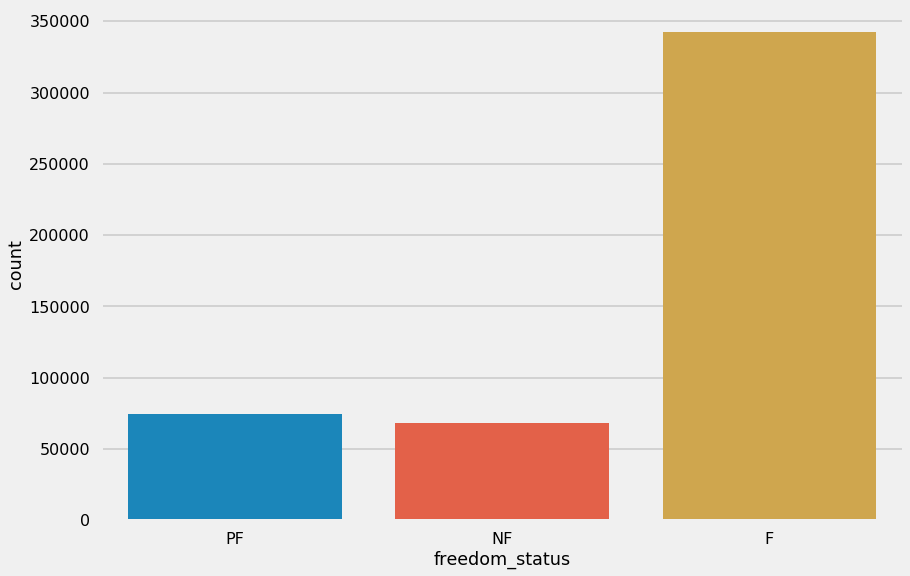

In [10]:
sns.countplot(data=df_clean, x='freedom_status')
plt.show()

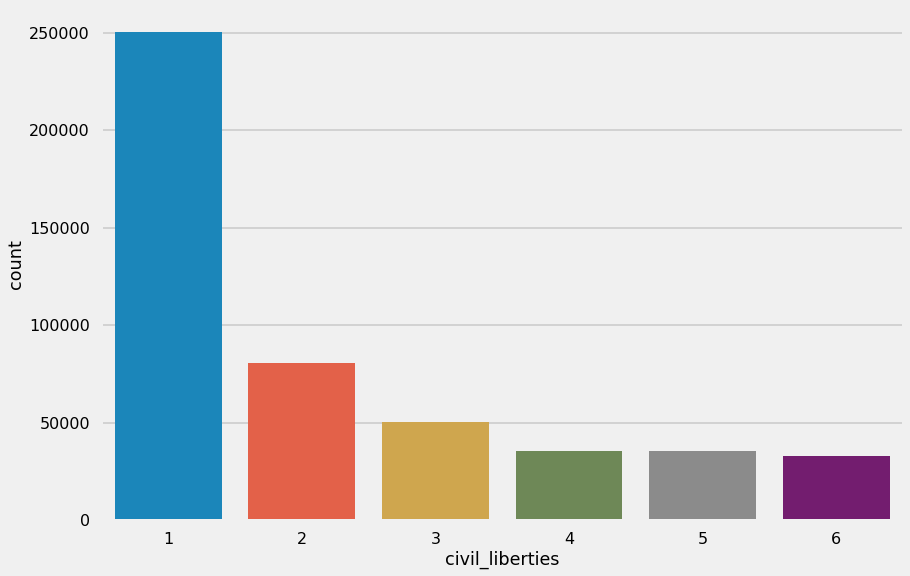

In [11]:
sns.countplot(data=df_clean, x='civil_liberties')
plt.show()

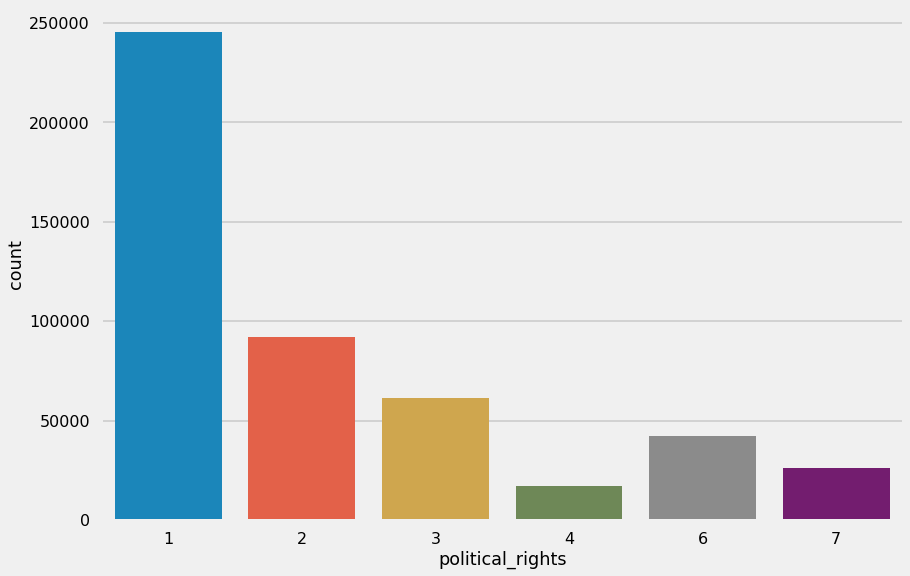

In [12]:
sns.countplot(data=df_clean, x='political_rights')
plt.show()

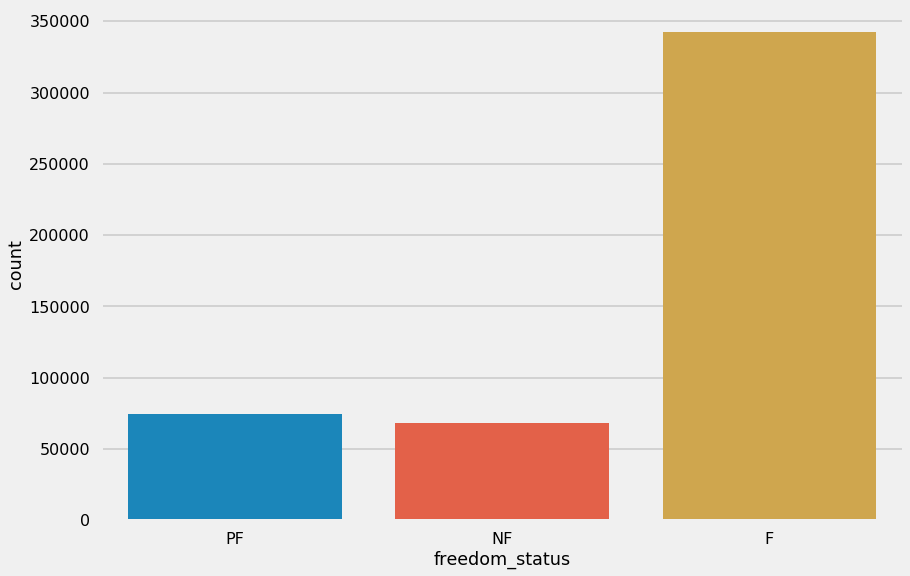

In [16]:
sns.countplot(data=df_clean, x='freedom_status')
plt.show()

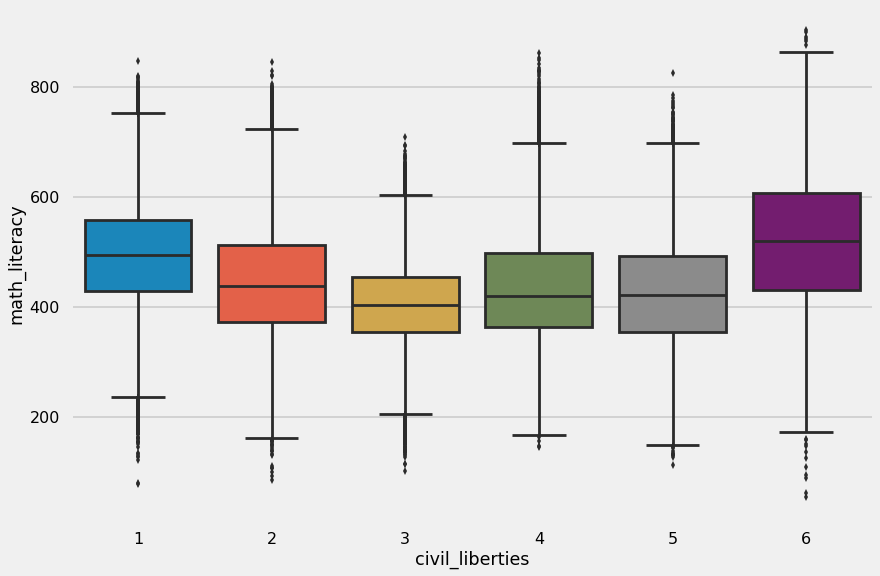

In [22]:
sns.boxplot(data=df_clean, x='civil_liberties', y='math_literacy')
plt.show()

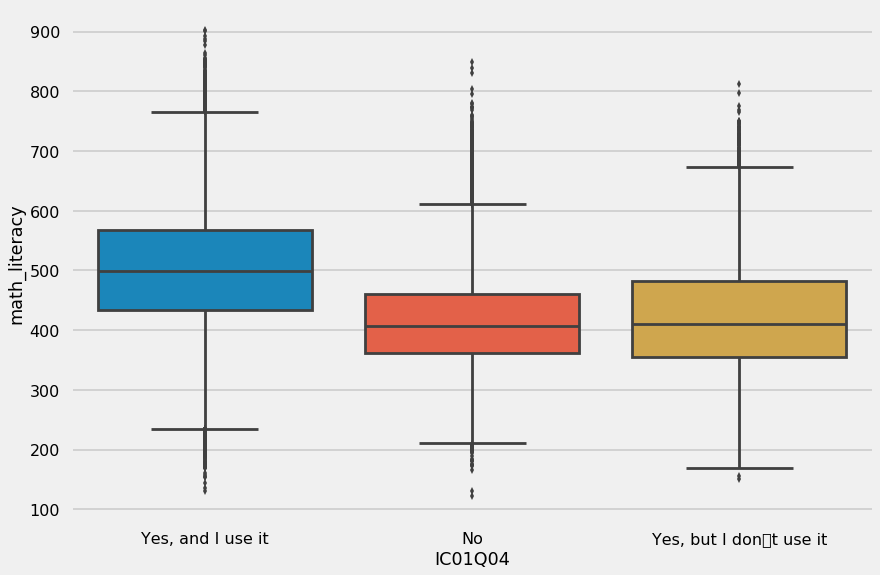

In [44]:
sns.boxplot(data=df_clean, x='IC01Q04', y='math_literacy')
plt.show()

In [58]:
# We have a lot of leading and trailing spaces and triples spaces
# ('Very   Likely') in our qualitative values, get rid of them

# Trim trailing/leading spaces
df_clean = df_clean.apply(lambda x: x.str.strip()
                          if x.dtype == "object" else x)

# Convert triple spaces to single space
df_clean = df_clean.apply(lambda x: x.str.replace('   ', ' ')
                          if x.dtype == "object" else x)


In [59]:
# Several of our columns have qualitative string ranges
print(df_clean.ST43Q03.unique())
print(df_clean.ST44Q08.unique())
print(df_clean.ST49Q05.unique())
print(df_clean.ST62Q12.unique())
print(df_clean.ST37Q07.unique())

['Disagree' 'Strongly disagree' 'Strongly agree' nan 'Agree']
['Very Likely' 'Likely' 'Slightly likely' nan 'Not at all likely']
['Sometimes' 'Always or almost always' nan 'Never or rarely' 'Often']
[nan 'Know it well,  understand the concept' 'Heard of it often'
 'Never heard of it' 'Heard of it a few times' 'Heard of it once or twice']
['Confident' 'Very confident' nan 'Not very confident'
 'Not at all confident']


In [36]:
'''
### TODO come back to this
#
# Keeping a dict of all the columns that need to be updated
ordinal_var_dict = {}

# Find all the columns that have the Agree/Disagree values
agree_col = df_clean.columns[df_clean.isin(['Strongly disagree']).any()]

# Create a dict for each of them with ordered values
for col in agree_col:
    tmp_dict = {
        col: ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    }
    ordinal_var_dict.update(tmp_dict)

# Find all the columns that have the Likely/Unlikely values
likely_col = df_clean.columns[df_clean.isin(['Not at all likely']).any()]

# Create a dict for each of them with ordered values
for col in likely_col:
    tmp_dict = {
        col:
        ['Not at all likely', 'Slightly likely', 'Likely', 'Very Likely']
    }
    ordinal_var_dict.update(tmp_dict)

# Find all the columns that have the Likely/Unlikely values
often_col = df_clean.columns[df_clean.isin(['Always or almost always']).any()]

# Create a dict for each of them with ordered values
for col in often_col:
    tmp_dict = {
        col:
        ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
    }
    ordinal_var_dict.update(tmp_dict)

# Find all the columns that have the confidence values
conf_col = df_clean.columns[df_clean.isin(['Never heard of it']).any()]

# Create a dict for each of them with ordered values
for col in conf_col:
    tmp_dict = {
        col: [
            'Not at all confident', 'Not very confident', 'Confident',
            'Very confident'
        ]
    }
    ordinal_var_dict.update(tmp_dict)
'''
;

''

In [37]:
'''
# From the diamond example projects: we have a lot of qualitative
# fields so I'm creating this dict so we have order
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)
'''
;

''

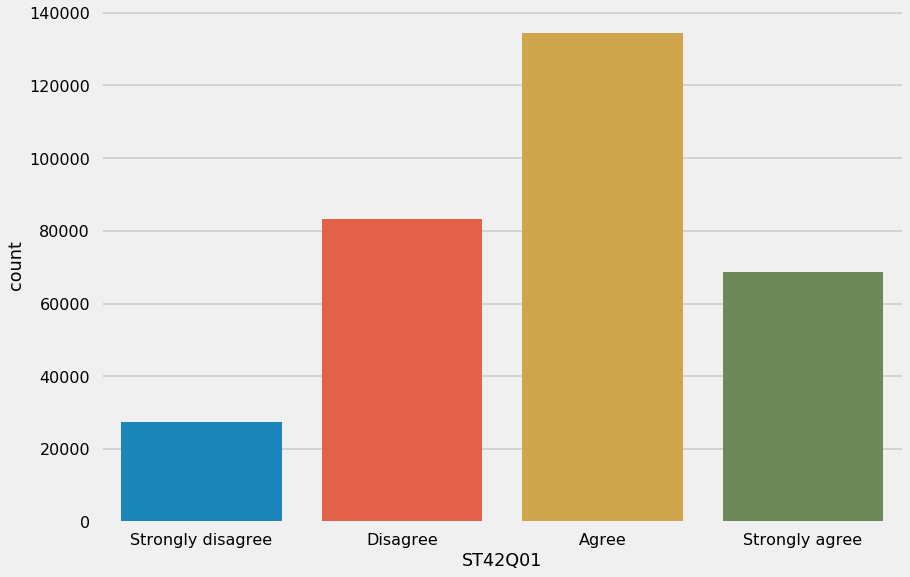

In [56]:
sns.countplot(data=df_clean, x='ST42Q01')
plt.show()

In [8]:
df_clean.CNT.value_counts().head(20)

Mexico                  33806
Italy                   31073
Spain                   25313
Canada                  21544
Brazil                  19204
Australia               14481
United Kingdom          12659
United Arab Emirates    11500
Switzerland             11229
Qatar                   10966
Colombia                 9073
Finland                  8829
Belgium                  8597
Denmark                  7481
Jordan                   7038
Chile                    6856
Thailand                 6606
Japan                    6351
Chinese Taipei           6046
Peru                     6035
Name: CNT, dtype: int64

## Quality issues

In [13]:
# Average of the five math evals - scaled to a mean of 500 
# and a standard deviation of 100
df_clean['math_literacy'] = ((df_clean['PV1MATH'] + df_clean['PV2MATH'] +
                             df_clean['PV3MATH'] + df_clean['PV4MATH'] +
                             df_clean['PV5MATH']) / 5)


In [45]:
df_clean['IC01Q04'].unique()

array([nan, 'Yes, and I use it', 'No', 'Yes, but I don\x92t use it'],
      dtype=object)

In [46]:
df_new = df_clean[['IC01Q04', 'math_literacy']]


In [47]:
rpt_dummies = pd.get_dummies(df_new['IC01Q04'])


In [48]:
df_new = df_new.join(rpt_dummies)


In [49]:
df_new.head()

,IC01Q04,math_literacy,No,"Yes, and I use it","Yes, but I dont use it"
0,NaN,366.18634,0,0,0
1,NaN,470.56396,0,0,0
2,NaN,505.53824,0,0,0
3,NaN,449.45476,0,0,0
4,NaN,385.50398,0,0,0


In [50]:
df_new['intercept'] = 1

In [51]:
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[['intercept', 'Yes, but I don\x92t use it', 'Yes, and I use it']],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                 3.189e+04
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        09:26:51   Log-Likelihood:            -2.8985e+06
No. Observations:              485490   AIC:                         5.797e+06
Df Residuals:                  485487   BIC:                         5.797e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 433.1051      0.203   2135.837      0.000     432.708     433.503
Yes, but I dont use it    -8.6002      1.121     -7.670      0.000     -10.798      -6.402
Yes, and I use it          68.5484      0.275    249.171      0.000      68.009      69.088
==============================================================================
Omnibus:                     4653.529   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4454.302
Skew:                           0.207   Prob(JB):                         0.00
Kurtosis:                       2.778   Cond. No.                         9.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!